# ARIMA

In [10]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

### CARGA DE LOS DATOS

In [11]:
completeRentalsDf = pd.read_csv('../data/completeData/rentals/completeRentalsDf.csv')
completeReturnsDf = pd.read_csv('../data/completeData/returns/completeReturnsDf.csv')

In [ ]:
completeRentalsDf = pd.read_csv('../data/completeData/rentals/completeRentalsDf_LOG1P.csv')
completeReturnsDf = pd.read_csv('../data/completeData/returns/completeReturnsDf_LOG1P.csv')

In [12]:
completeRentalsDf.set_index('Date', inplace=True)
completeReturnsDf.set_index('Date', inplace=True)
completeRentalsDf['Date'] = completeReturnsDf['Date'] = pd.to_datetime(completeRentalsDf.index.values)

### AUGMENTED DICKEY-FULLER

In [13]:
result = adfuller(completeRentalsDf['31201'])
print('Resultados del ADF para los alquileres de la estacion 31201')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Resultados del ADF para los alquileres de la estacion 31201
ADF Statistic: -15.346958
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [14]:
result = adfuller(completeReturnsDf['31201'])
print('Resultados del ADF para las devoluciones de la estacion 31201')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Resultados del ADF para las devoluciones de la estacion 31201
ADF Statistic: -15.231017
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### MODELO ARIMA

In [7]:
X = completeRentalsDf['31201']
size = int(len(X) * 0.9750653) # Train 4106 dias, Test 105 dias
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [8]:
model = ARIMA(history, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary)
predictions = model_fit.forecast(len(test), alpha=0.05)  # 95% conf
print(predictions)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x0000028863679D90>>
[1.62140502 2.38793644 2.92639581 ... 4.19765416 4.19765416 4.19765416]
Test RMSE: 3.170


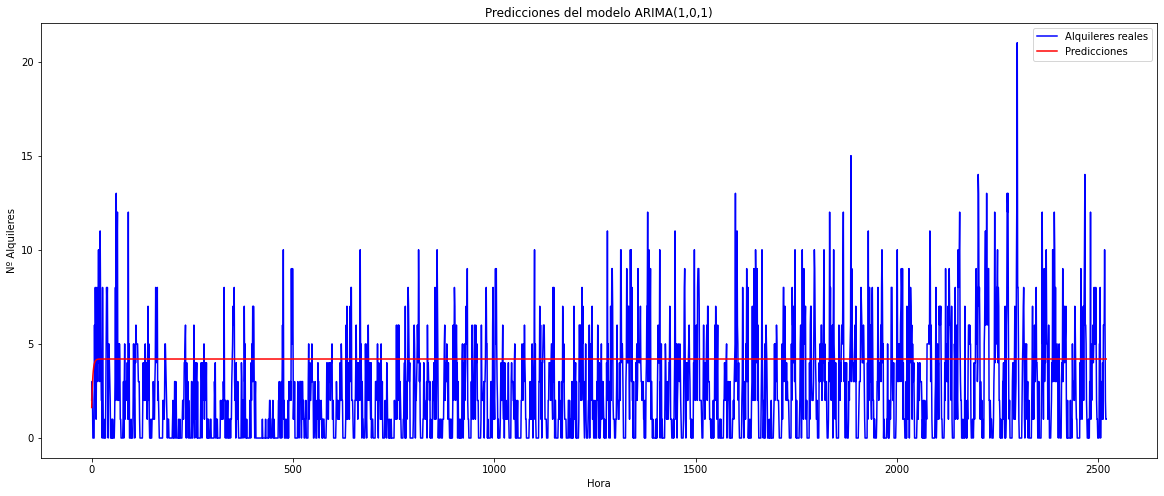

In [27]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(test.values, color='b', label="Alquileres reales")
plt.plot(predictions, color='r', label="Predicciones")
plt.ylabel('Nº Alquileres')
plt.xlabel('Hora')
plt.title("Predicciones del modelo ARIMA(1,0,1)")
plt.legend()
plt.show()